# A Python Refresher




# Envirnoments and packages

It is recommended that you create a separate python envirnoment (using venv or conda) and dedicate it for this course.

***On your envirnoment install the following packages:***

**numpy, scipy**: Basic math functions, optimization and linear algebra software

**sympy** : Symbolic math software

**matplotlib** : Plotting software

**control, qpsolvers** : control and optimization software 


## Linear Algebra

In [1]:
import numpy as np 

# creating matrices and vectors in python
# create a matrix by direct assignment
A = np.array([
    [1,2],
    [2,1]
    ])
# similarly for vectors
b = np.array([
    [1],
    [1]
])
# create a matrix with zeros or ones
Z = np.zeros((2,2)) # np.ones((n_row,n_col)) is also possible

# you can stack matices vertically, horizontally with vstack and hstack
AA = np.hstack([A,A,A]) 

# matrix multiplication 
Ab = A@b
# transpose 
At = A.T

# inverse 
Aiv = np.linalg.inv(A)

# Computing eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(A)


## Quadratic Programming
At times in the MPC course, we will make use of Quadratic Programming using off the shelf libraries. One such libray in python is the qpsolvers which provides a wide variety of QP solvers. See the documentation for more info: https://github.com/qpsolvers/qpsolvers 


## Demo Simulation : Cart-Pole System
The assignments in this course make use of a custom nonlinear system of cart + pole to test various MPC algorithms.

The cartpole.py class provides the necessary functionality for simulating and animating the system. Bellow is a quick overview of how to use it.

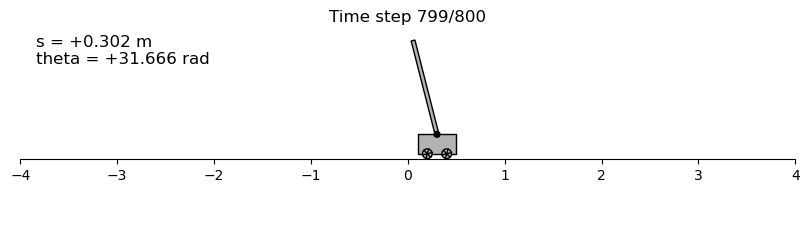

In [2]:
from cartpole import CartPole
import matplotlib.pyplot as plt 

cp = CartPole(animate=True) # instantiate the cart-pole simulator
fig = cp.set_animation_figure(notebook_mode = True)   # creates a figure and enable notebook mode, for a py script let notebook_mode = False
x0 = np.array([0.0, 0.0, 0.0, 0.0] )    # initial state
cp.x[:] = x0  
dt = 0.025          # sampling time
T = 20              # simulation time
t = np.arange(0,T,dt)   # [s] time vector
Nsim = t.shape[0]

# test control
Usim = 0.2*np.ones(Nsim) # push to the right for some time
Usim[144:464 ] = -0.2       # then push to the left

# simulation loop
Xsim = np.ones((Nsim,4))*np.inf
Xsim[0,:] = x0
for k in range(Nsim):
    cp.simulate(F=Usim[k], dt=dt, disturbance=0.0,title=f'Time step {k}/{Nsim}')
    Xsim[k] = cp.x
plt.close(fig)